In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Processing Function


In [7]:
def process_e_data(file_path):
    baseline = pd.read_csv('benchmark_results_sleep.csv')
    #calculate average of baseline
    baseline_avg = baseline['Energy (Joules)'].mean()
    

    data = pd.read_csv('benchmark_results.csv')
    df = pd.DataFrame(data)

    # subtract baseline from energy column
    df['Energy (Joules)'] = df['Energy (Joules)'] - baseline_avg
    # Divide by 60 to get average power
    df['Energy (Joules)'] = df['Energy (Joules)'] / 60

    # Create the violin plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile", palette={"Firefox": "skyblue", "Chrome": "lightcoral"}) #inner="quartile" adds quartiles to the violin plot.

    plt.title('Average Power by Browser')
    plt.xlabel('Browser')
    plt.ylabel('Average Power (Watts/W)')
    plt.show()


    #make distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Energy (Joules)', hue='Browser', kde=True, palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title('Average Power Consumption by Browser')
    plt.xlabel('Average Power (Watts/W)')
    plt.ylabel('Frequency')
    plt.show()


    #t-test
    firefox = df[df['Browser'] == 'Firefox']['Energy (Joules)']
    chrome = df[df['Browser'] == 'Chrome']['Energy (Joules)']

    t_stat, p_val=t = ttest_ind(firefox, chrome)

    print(f'The p-value is: {p_val}')
    print(f'The t-statistic is: {t_stat}')
    # print(f'The confidence interval is: {conf_int}')



# Results


/tmp/ipykernel_83658/728682320.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile", palette={"Firefox": "skyblue", "Chrome": "lightcoral"}) #inner="quartile" adds quartiles to the violin plot.


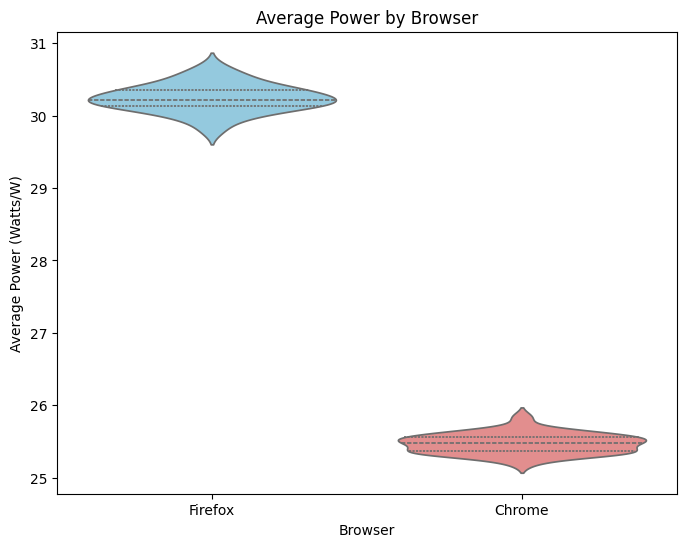

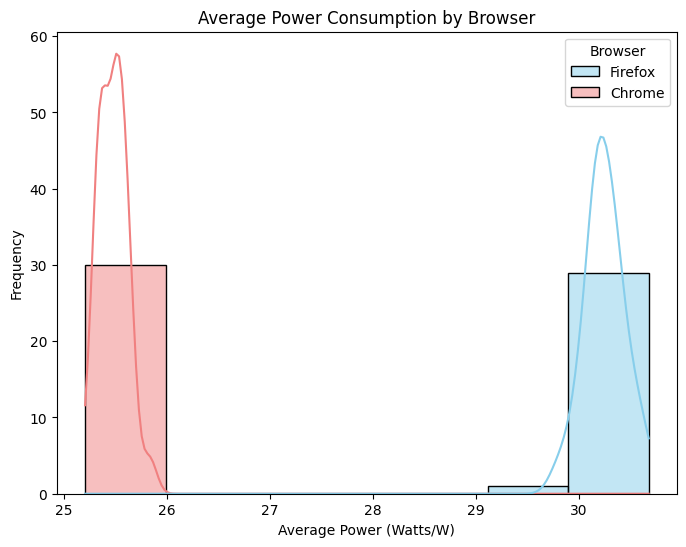

/tmp/ipykernel_83658/728682320.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile", palette={"Firefox": "skyblue", "Chrome": "lightcoral"}) #inner="quartile" adds quartiles to the violin plot.


The p-value is: 3.400321643650894e-69
The t-statistic is: 110.73182167214568


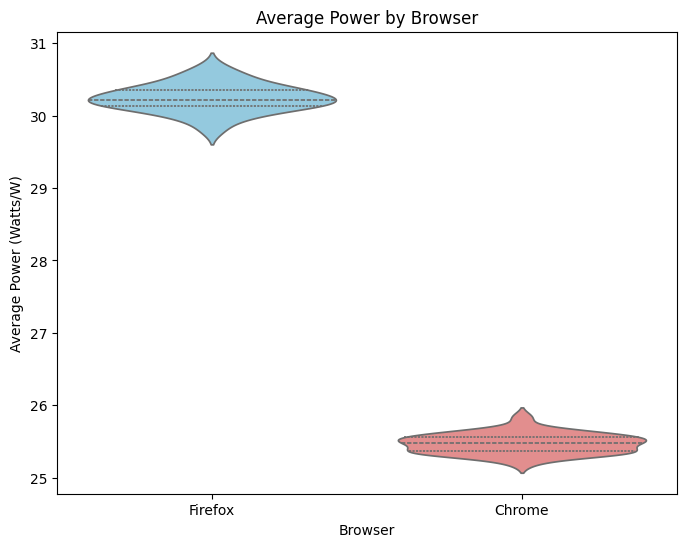

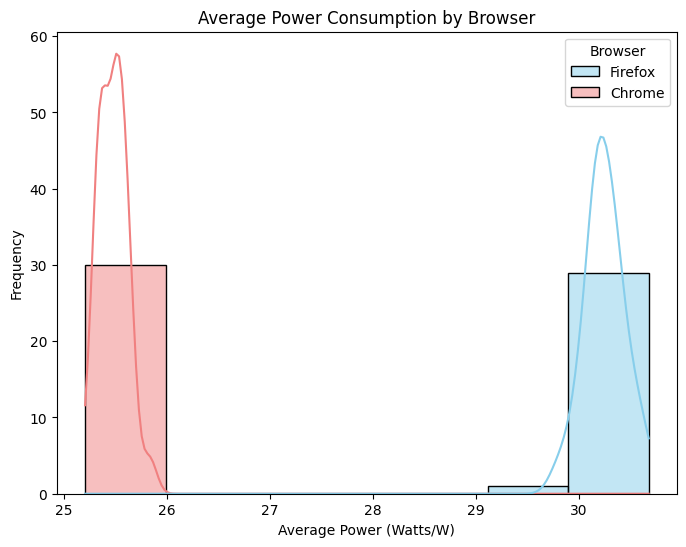

The p-value is: 3.400321643650894e-69
The t-statistic is: 110.73182167214568


In [8]:
process_e_data('benchmark_results.csv')
process_e_data('benchmark_results_cubes.csv')